<a href="https://colab.research.google.com/github/karanaithal01/Comparison-of-Various-Machine-Learning-Algorithms-on-UCI-Heart-Dataset/blob/main/Comparison_of_ML_models_on_Heart_UCI_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Algorithms applied on UCI Heart Dataset

Importing Libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['heart.csv', 'Heart_disease_prediction.ipynb', 'README.md', 'Trial1.ipynb']


Importing the dataset

In [ ]:
dataset = pd.read_csv("heart.csv")
print(type(dataset));
print(dataset.shape);

<class 'pandas.core.frame.DataFrame'>
(303, 14)


In [ ]:
dataset.head(5) # First 5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5) #random 5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1


In [ ]:
dataset.describe()  #description


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Exploratory Data Analysis

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].unique() 

array([1, 0], dtype=int64)

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))  #correlation of columns

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [ ]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

1    165
0    138
Name: target, dtype: int64


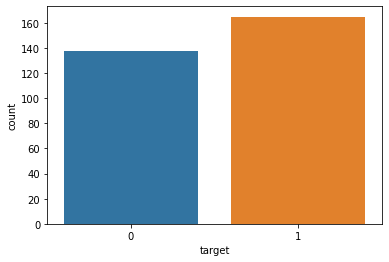

In [ ]:
#taret variable
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


Analysing Categorical values-  SEX, CP, FBS

In [ ]:
print("Sex -",dataset["sex"].unique())
print("CP -",dataset["cp"].unique())
print("fbs -",dataset["fbs"].unique())
print("restecg -",dataset["restecg"].unique())
print("exang -",dataset["exang"].unique())
print("slope -",dataset["slope"].unique())
print("ca -",dataset["ca"].unique())
print("thal -",dataset["thal"].unique())

Sex - [1 0]
CP - [3 2 1 0]
fbs - [1 0]
restecg - [0 1 2]
exang - [0 1]
slope - [0 2 1]
ca - [0 2 1 3 4]
thal - [1 2 3 0]


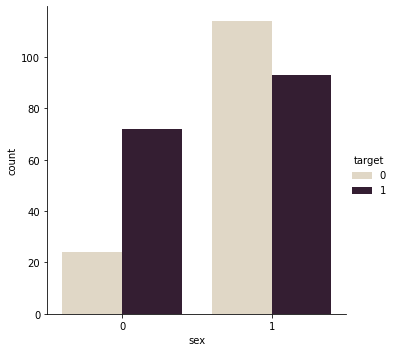

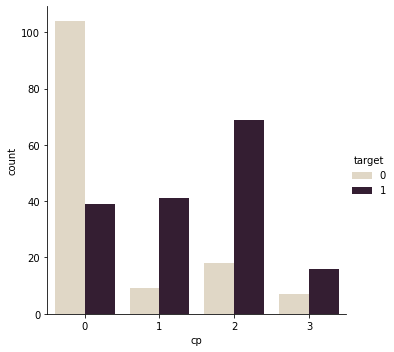

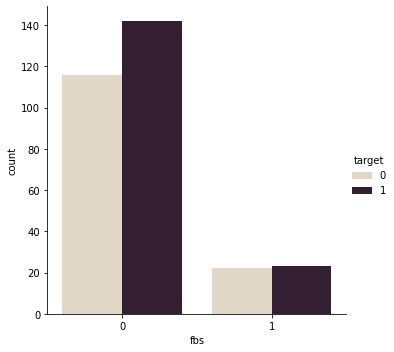

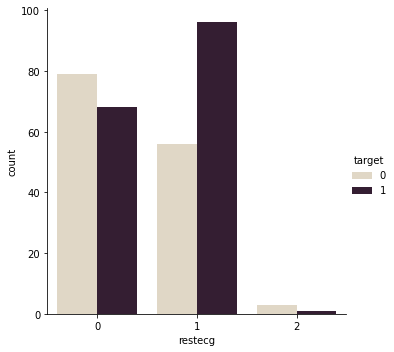

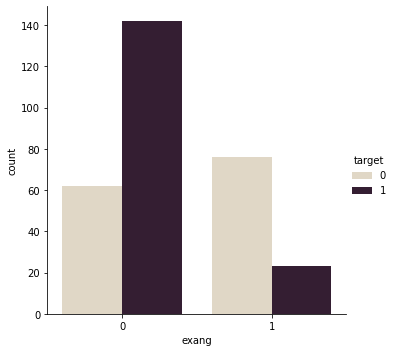

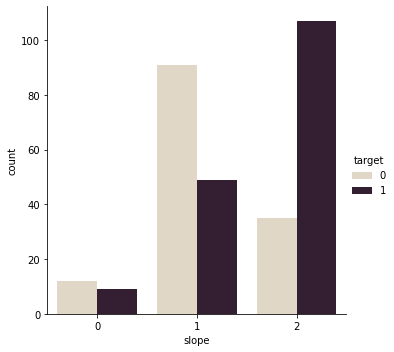

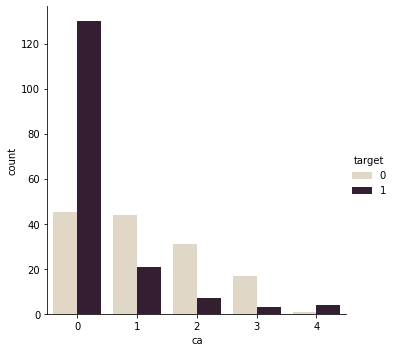

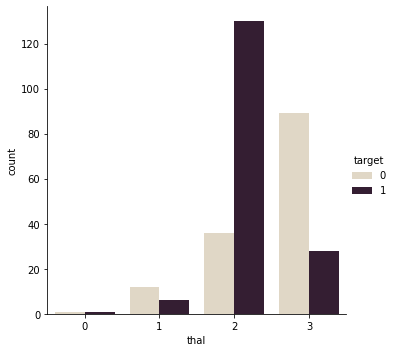

In [ ]:
sns.catplot(x='sex', kind='count',hue = 'target', data = dataset, palette = 'ch: .28')
sns.catplot(x='cp', kind='count',hue = 'target', data = dataset, palette = 'ch: .28')
sns.catplot(x='fbs', kind='count',hue = 'target', data = dataset, palette = 'ch: .28')
sns.catplot(x='restecg', kind='count',hue = 'target', data = dataset, palette = 'ch: .28')
sns.catplot(x='exang', kind='count',hue = 'target', data = dataset, palette = 'ch: .28')
sns.catplot(x='slope', kind='count',hue = 'target', data = dataset, palette = 'ch: .28')
sns.catplot(x='ca', kind='count',hue = 'target', data = dataset, palette = 'ch: .28')
sns.catplot(x='thal', kind='count',hue = 'target', data = dataset, palette = 'ch: .28')

Distributive Variables

In [ ]:
#distributive variables
dataset[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


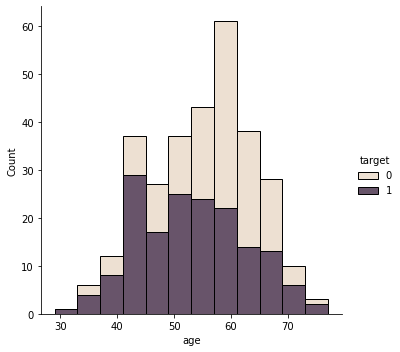

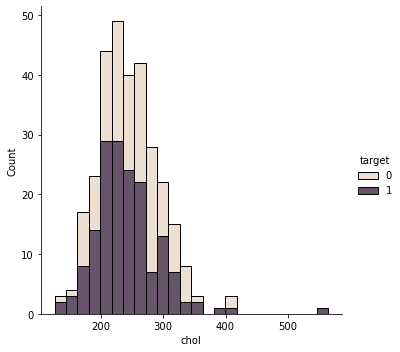

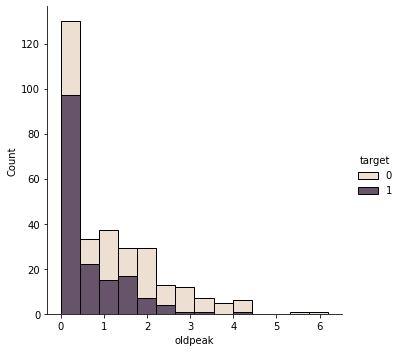

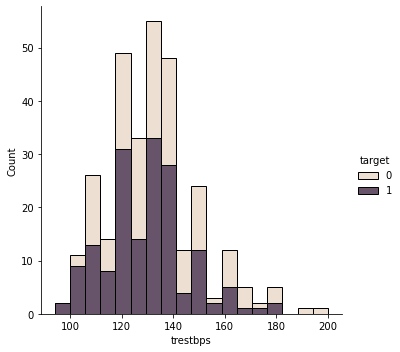

In [ ]:
sns.displot(x='age',multiple='stack',hue='target',data=dataset,palette='ch: .2')
sns.displot(x='chol',multiple='stack',hue='target',data=dataset,palette='ch: .2')
sns.displot(x='oldpeak',multiple='stack',hue='target',data=dataset,palette='ch: .2')
sns.displot(x='trestbps',multiple='stack',hue='target',data=dataset,palette='ch: .2')

Test and Train Split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
print("X TRAIN ", X_train.shape)
print("X TEST ", X_test.shape)
print("Y TRAIN ", Y_train.shape)
print("Y TEST ", Y_test.shape)

X TRAIN  (242, 13)
X TEST  (61, 13)
Y TRAIN  (242,)
Y TEST  (61,)


In [ ]:
#standardize data The idea is to rescalean orignal value to have equal impact
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
x_train1 = sc.transform(X_train)
x_test1 = sc.transform(X_test)

print("X TRAIN ", x_train1.shape)
print("X TEST ", x_test1.shape)

X TRAIN  (242, 13)
X TEST  (61, 13)


Machine Learning Models

1. Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

Y_pred_lr.shape

score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


    0   1
0  22   5
1   4  30


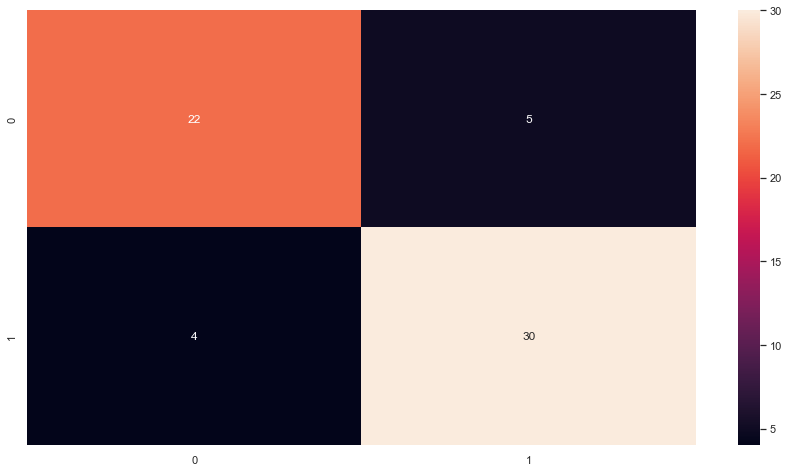

 Accuracy: 85.24590163934425 %
 Sensitivity: 81.48148148148148 % 
 Specificity: 88.23529411764706 % 
 positive predictive value: 84.61538461538461 % 
 negative predictive value: 20.0 % 



In [ ]:
cm_lr = metrics.confusion_matrix(Y_test,Y_pred_lr)
cm_lr = pd.DataFrame(cm_lr)
print(cm_lr)
sns.heatmap(cm_lr, annot=True)
plt.show()

TP = cm_lr[0][0]
FP = cm_lr[0][1]
TN = cm_lr[1][1]
FN = cm_lr[1][0]
accu_lr = (TP + TN) / (TP + TN + FP + FN)
miss = (FP + FN) / (TP + TN + FP + FN)
sensitivity_lr = TP / (TP+FN )* 100
specificity_lr = TN /(TN + FP)*100
ppv_lr = TP / (TP+FP) *100
npv_lr = TN / (TN*FN) *100

print(' Accuracy:',accu_lr*100,'%\n','Sensitivity:', sensitivity_lr,'% \n','Specificity:', specificity_lr,'% \n','positive predictive value:',ppv_lr,'% \n','negative predictive value:',npv_lr,'% \n' ) 

2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

Y_pred_nb.shape

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


    0   1
0  21   6
1   3  31


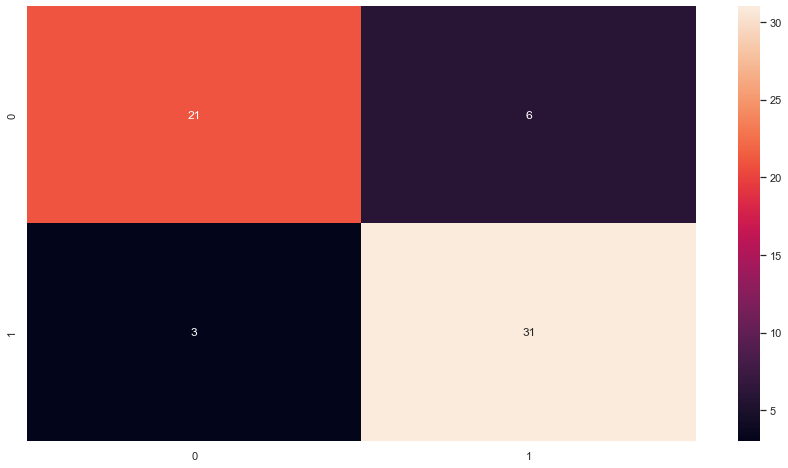

 Accuracy: 85.24590163934425 %
 Sensitivity: 77.77777777777779 % 
 Specificity: 91.17647058823529 % 
 positive predictive value: 87.5 % 
 negative predictive value: 16.666666666666664 % 



In [ ]:
cm_nb = metrics.confusion_matrix(Y_test,Y_pred_nb)
cm_nb = pd.DataFrame(cm_nb)
print(cm_nb)
sns.heatmap(cm_nb, annot=True)
plt.show()

TP = cm_nb[0][0]
FP = cm_nb[0][1]
TN = cm_nb[1][1]
FN = cm_nb[1][0]
accu_nb = (TP + TN) / (TP + TN + FP + FN)
miss_nb = (FP + FN) / (TP + TN + FP + FN)

sensitivity_nb = TP / (TP+FN )* 100
specificity_nb = TN /(TN + FP)*100
ppv_nb = TP / (TP+FP) *100
npv_nb = TN / (TN*FN) *100

print(' Accuracy:',accu_nb*100,'%\n','Sensitivity:', sensitivity_nb,'% \n','Specificity:', specificity_nb,'% \n','positive predictive value:',ppv_nb,'% \n','negative predictive value:',npv_nb,'% \n' ) 

3. SVM

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

Y_pred_svm.shape

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


    0   1
0  20   7
1   4  30


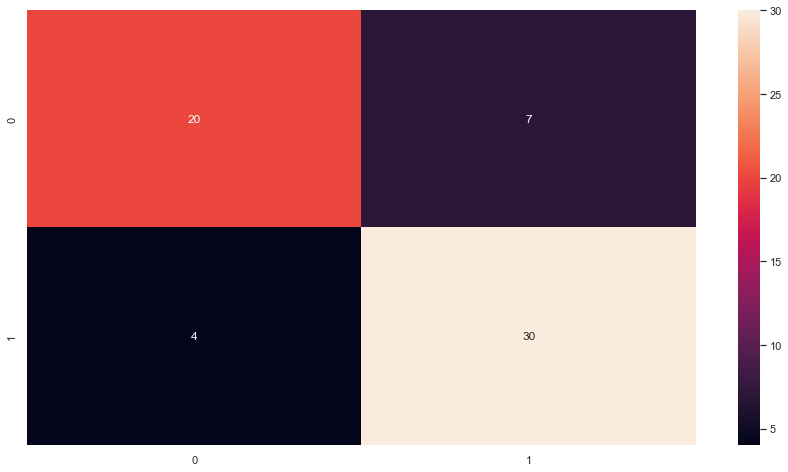

 Accuracy: 81.9672131147541 %
 Sensitivity: 74.07407407407408 % 
 Specificity: 88.23529411764706 % 
 positive predictive value: 83.33333333333334 % 
 negative predictive value: 14.285714285714285 % 



In [ ]:
cm_svm = metrics.confusion_matrix(Y_test,Y_pred_svm)
cm_svm = pd.DataFrame(cm_svm)
print(cm_svm)
sns.heatmap(cm_svm, annot=True)
plt.show()

TP = cm_svm[0][0]
FP = cm_svm[0][1]
TN = cm_svm[1][1]
FN = cm_svm[1][0]
accu_svm = (TP + TN) / (TP + TN + FP + FN)
miss_svm = (FP + FN) / (TP + TN + FP + FN)

sensitivity_svm = TP / (TP+FN )* 100
specificity_svm = TN /(TN + FP)*100
ppv_svm = TP / (TP+FP) *100
npv_svm = TN / (TN*FN) *100

print(' Accuracy:',accu_svm*100,'%\n','Sensitivity:', sensitivity_svm,'% \n','Specificity:', specificity_svm,'% \n','positive predictive value:',ppv_svm,'% \n','negative predictive value:',npv_svm,'% \n' ) 

4. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


Now Let's Standardize the Dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#parameters for grid search
knn = KNeighborsClassifier
parameters = {'n_neighbors': [3,4,7,9,11], 'weights': ['uniform','distance']}

grid_params = {
    'n_neighbors': [3,4,5,7,9,11],
    'weights': ['uniform','distance'],
    'metric' : ['euclidean', 'manhattan']
    }

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    cv = 4,
    
    scoring='accuracy'
)

gs_results = gs.fit(x_train1, Y_train)

print(gs_results.best_params_)

model = gs_results.best_estimator_

model.score(x_test1, Y_test)

Y_pred_SKNN = model.predict(x_test1)


{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


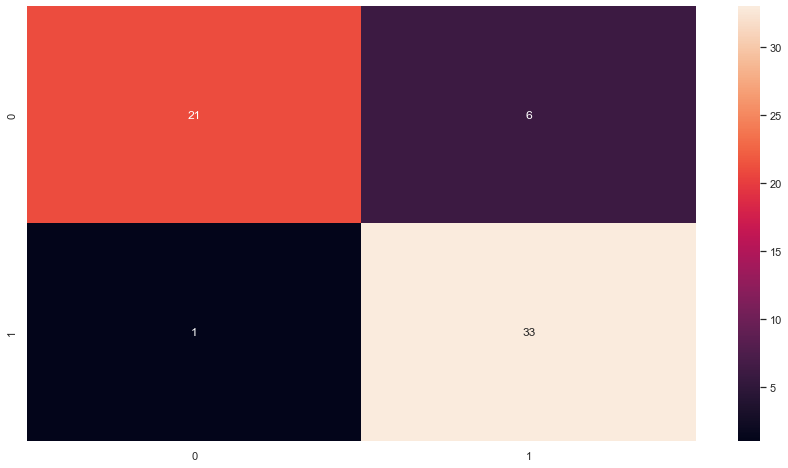

 Accuracy: 88.52459016393442 %
 Sensitivity: 77.77777777777779 % 
 Specificity: 97.05882352941177 % 
 positive predictive value: 95.45454545454545 % 
 negative predictive value: 16.666666666666664 % 



In [ ]:

cm_knn = metrics.confusion_matrix(Y_test,Y_pred_SKNN)
cm_knn = pd.DataFrame(cm_knn)
sns.heatmap(cm_knn, annot=True)
plt.show()

TP = cm_knn[0][0]
FP = cm_knn[0][1]
TN = cm_knn[1][1]
FN = cm_knn[1][0]
accu_knn = (TP + TN) / (TP + TN + FP + FN)
miss_knn = (FP + FN) / (TP + TN + FP + FN)

sensitivity_knn = TP / (TP+FN )* 100
specificity_knn = TN /(TN + FP)*100
ppv_knn = TP / (TP+FP) *100
npv_knn = TN / (TN*FN) *100

print(' Accuracy:',accu_knn*100,'%\n','Sensitivity:', sensitivity_knn,'% \n','Specificity:', specificity_knn,'% \n','positive predictive value:',ppv_knn,'% \n','negative predictive value:',npv_knn,'% \n' ) 

In [ ]:
score_knn = round(accuracy_score(Y_pred_SKNN,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 88.52 %


5. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

print(Y_pred_dt.shape)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

(61,)
The accuracy score achieved using Decision Tree is: 81.97 %


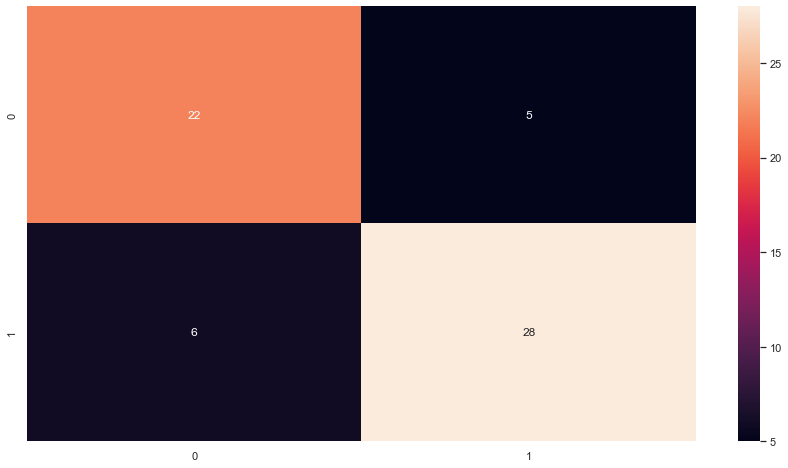

 Accuracy: 81.9672131147541 %
 Sensitivity: 81.48148148148148 % 
 Specificity: 82.35294117647058 % 
 positive predictive value: 78.57142857142857 % 
 negative predictive value: 20.0 % 



In [ ]:
cm_dt = metrics.confusion_matrix(Y_test,Y_pred_dt)
cm_dt = pd.DataFrame(cm_dt)
sns.heatmap(cm_dt, annot=True)
plt.show()

TP = cm_dt[0][0]
FP = cm_dt[0][1]
TN = cm_dt[1][1]
FN = cm_dt[1][0]
accu_dt = (TP + TN) / (TP + TN + FP + FN)
miss_dt = (FP + FN) / (TP + TN + FP + FN)

sensitivity_dt = TP / (TP+FN )* 100
specificity_dt = TN /(TN + FP)*100
ppv_dt = TP / (TP+FP) *100
npv_dt = TN / (TN*FN) *100

print(' Accuracy:',accu_dt*100,'%\n','Sensitivity:', sensitivity_dt,'% \n','Specificity:', specificity_dt,'% \n','positive predictive value:',ppv_dt,'% \n','negative predictive value:',npv_dt,'% \n' ) 

6. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

Y_pred_rf.shape

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 90.16 %


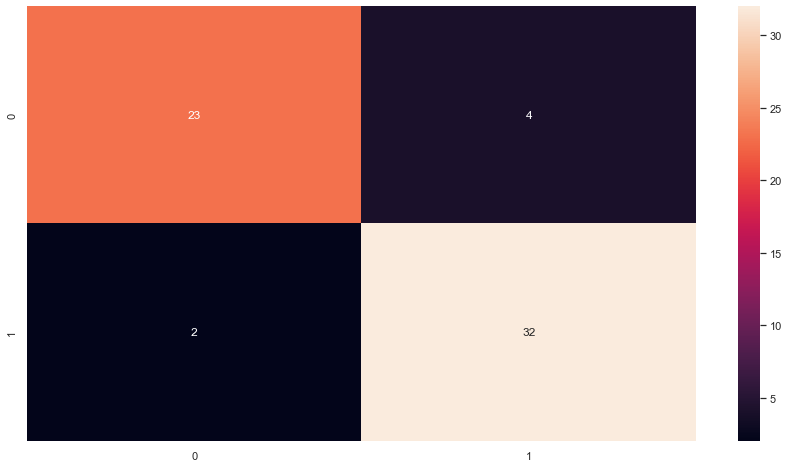

 Accuracy: 90.1639344262295 %
 Sensitivity: 85.18518518518519 % 
 Specificity: 94.11764705882352 % 
 positive predictive value: 92.0 % 
 negative predictive value: 25.0 % 



In [ ]:
cm_rf = metrics.confusion_matrix(Y_test,Y_pred_rf)
cm_rf = pd.DataFrame(cm_rf)
sns.heatmap(cm_rf, annot=True)
plt.show()

TP = cm_rf[0][0]
FP = cm_rf[0][1]
TN = cm_rf[1][1]
FN = cm_rf[1][0]
accu_rf = (TP + TN) / (TP + TN + FP + FN)
miss_rf = (FP + FN) / (TP + TN + FP + FN)

sensitivity_rf = TP / (TP+FN )* 100
specificity_rf = TN /(TN + FP)*100
ppv_rf = TP / (TP+FP) *100
npv_rf = TN / (TN*FN) *100

print(' Accuracy:',accu_rf*100,'%\n','Sensitivity:', sensitivity_rf,'% \n','Specificity:', specificity_rf,'% \n','positive predictive value:',ppv_rf,'% \n','negative predictive value:',npv_rf,'% \n' ) 

### XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric='mlogloss')
xgb_model.fit(x_train1, Y_train)

Y_pred_xgb = xgb_model.predict(x_test1)

Y_pred_xgb.shape

score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


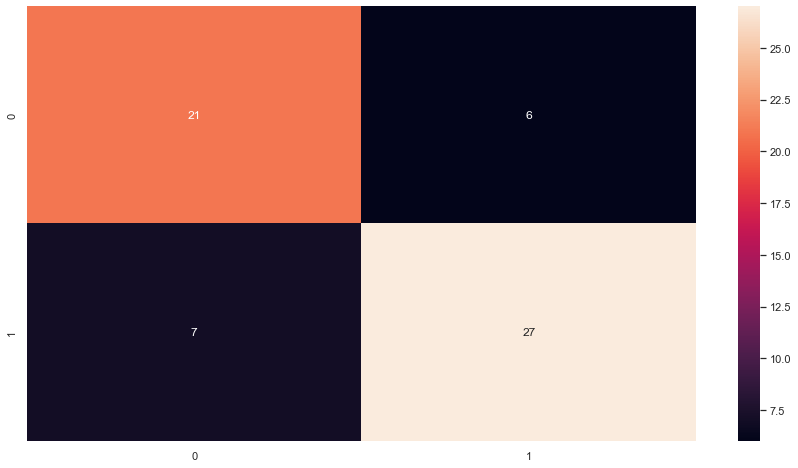

 Accuracy: 78.68852459016394 %
 Sensitivity: 77.77777777777779 % 
 Specificity: 79.41176470588235 % 
 positive predictive value: 75.0 % 
 negative predictive value: 16.666666666666664 % 



In [ ]:
cm_xgb = metrics.confusion_matrix(Y_test,Y_pred_xgb)
cm_xgb = pd.DataFrame(cm_xgb)
sns.heatmap(cm_xgb, annot=True)
plt.show()

TP = cm_xgb[0][0]
FP = cm_xgb[0][1]
TN = cm_xgb[1][1]
FN = cm_xgb[1][0]
accu_xgb = (TP + TN) / (TP + TN + FP + FN)
miss_xgb = (FP + FN) / (TP + TN + FP + FN)

sensitivity_xgb = TP / (TP+FN )* 100
specificity_xgb = TN /(TN + FP)*100
ppv_xgb = TP / (TP+FP) *100
npv_xgb = TN / (TN*FN) *100

print(' Accuracy:',accu_xgb*100,'%\n','Sensitivity:', sensitivity_xgb,'% \n','Specificity:', specificity_xgb,'% \n','positive predictive value:',ppv_xgb,'% \n','negative predictive value:',npv_xgb,'% \n' ) 

### Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train1,Y_train,epochs=300)

Epoch 1/300
242/242 [==============================] - 0s 1ms/step - loss: 0.6849 - acc: 0.6570
Epoch 2/300
242/242 [==============================] - 0s 39us/step - loss: 0.6619 - acc: 0.6736
Epoch 3/300
242/242 [==============================] - 0s 49us/step - loss: 0.6403 - acc: 0.6983
Epoch 4/300
242/242 [==============================] - 0s 52us/step - loss: 0.6212 - acc: 0.7231
Epoch 5/300
242/242 [==============================] - 0s 45us/step - loss: 0.6043 - acc: 0.7314
Epoch 6/300
242/242 [==============================] - 0s 41us/step - loss: 0.5869 - acc: 0.7273
Epoch 7/300
242/242 [==============================] - 0s 42us/step - loss: 0.5720 - acc: 0.7438
Epoch 8/300
242/242 [==============================] - 0s 45us/step - loss: 0.5575 - acc: 0.7438
Epoch 9/300
242/242 [==============================] - 0s 37us/step - loss: 0.5448 - acc: 0.7479
Epoch 10/300
242/242 [==============================] - 0s 38us/step - loss: 0.5318 - acc: 0.7562
Epoch 11/300
242/242 [========

In [ ]:
Y_pred_nn = model.predict(x_test1)

Y_pred_nn.shape

(61, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")
#83.61 on stadadizing
#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 86.89 %


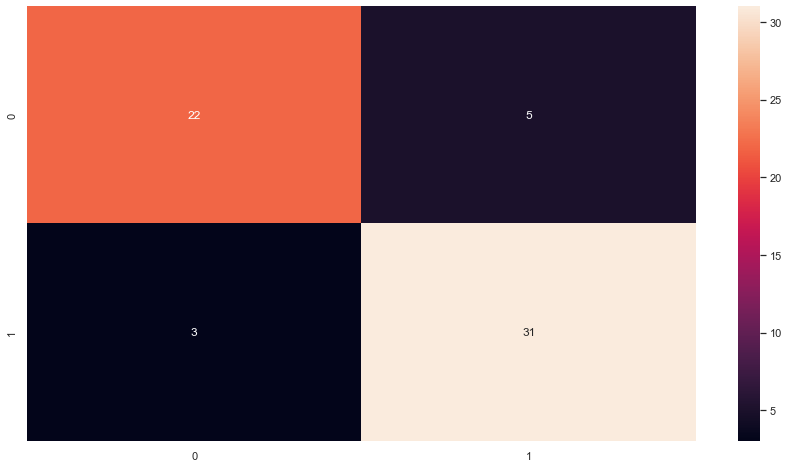

 Accuracy: 86.88524590163934 %
 Sensitivity: 81.48148148148148 % 
 Specificity: 91.17647058823529 % 
 positive predictive value: 88.0 % 
 negative predictive value: 20.0 % 



In [ ]:
cm_nn = metrics.confusion_matrix(Y_test,Y_pred_nn)
cm_nn = pd.DataFrame(cm_nn)
sns.heatmap(cm_nn, annot=True)
plt.show()

TP = cm_nn[0][0]
FP = cm_nn[0][1]
TN = cm_nn[1][1]
FN = cm_nn[1][0]
accu_nn = (TP + TN) / (TP + TN + FP + FN)
miss_nn = (FP + FN) / (TP + TN + FP + FN)

sensitivity_nn = TP / (TP+FN )* 100
specificity_nn = TN /(TN + FP)*100
ppv_nn = TP / (TP+FP) *100
npv_nn = TN / (TN*FN) *100

print(' Accuracy:',accu_nn*100,'%\n','Sensitivity:', sensitivity_nn,'% \n','Specificity:', specificity_nn,'% \n','positive predictive value:',ppv_nn,'% \n','negative predictive value:',npv_nn,'% \n' ) 

Comparision of Algorithms

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    
algorithms_1 = ["Logistic Regression","Naive Bayes","SVM","KNN","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 88.52 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 78.69 %
The accuracy score achieved using Neural Network is: 86.89 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

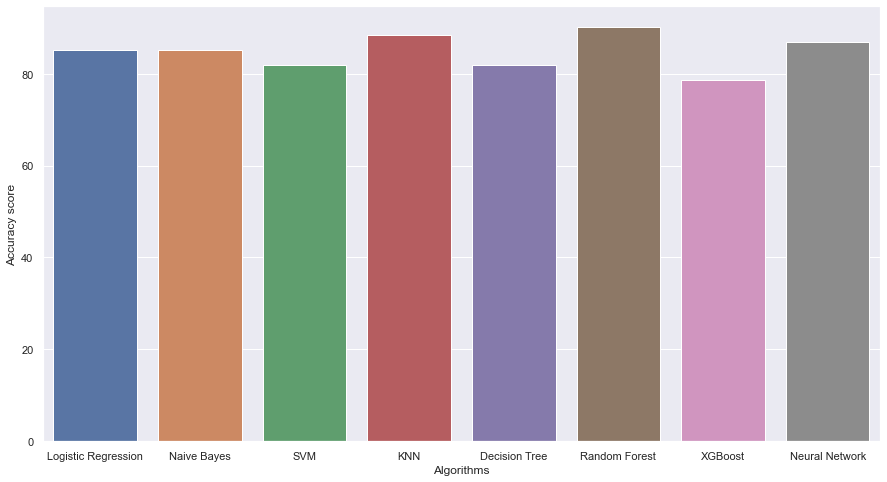

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms_1,scores)

The sensitivity score achieved using Logistic Regression is: 81.48148148148148 %
The sensitivity score achieved using Naive Bayes is: 77.77777777777779 %
The sensitivity score achieved using Support Vector Machine is: 74.07407407407408 %
The sensitivity score achieved using K-Nearest Neighbors is: 77.77777777777779 %
The sensitivity score achieved using Decision Tree is: 81.48148148148148 %
The sensitivity score achieved using Random Forest is: 85.18518518518519 %
The sensitivity score achieved using XGBoost is: 77.77777777777779 %
The sensitivity score achieved using Neural Network is: 81.48148148148148 %


<AxesSubplot:xlabel='Algorithms', ylabel='Sensitivity score'>

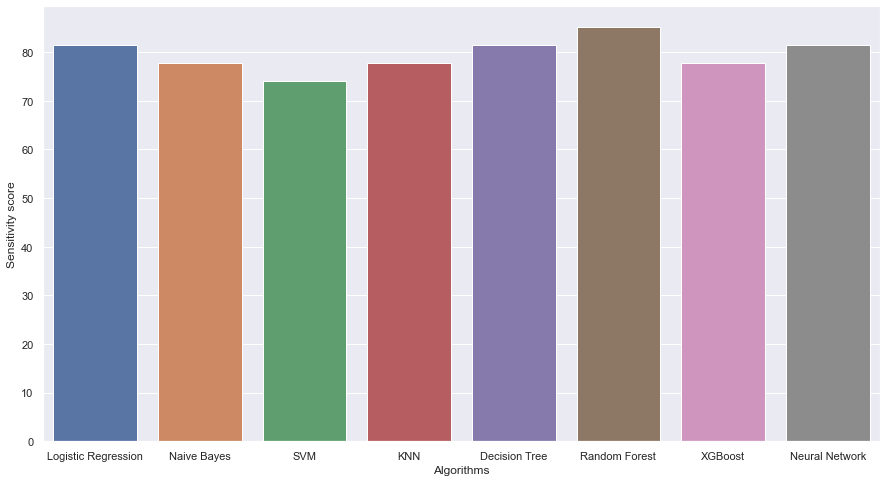

In [ ]:
sensitivity = [sensitivity_lr,sensitivity_nb,sensitivity_svm,sensitivity_knn,sensitivity_dt,sensitivity_rf,sensitivity_xgb,sensitivity_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    
algorithms_1 = ["Logistic Regression","Naive Bayes","SVM","KNN","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The sensitivity score achieved using "+algorithms[i]+" is: "+str(sensitivity[i])+" %")

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Sensitivity score")

sns.barplot(algorithms_1,sensitivity)

The specificity score achieved using Logistic Regression is: 88.23529411764706 %
The specificity score achieved using Naive Bayes is: 91.17647058823529 %
The specificity score achieved using Support Vector Machine is: 88.23529411764706 %
The specificity score achieved using K-Nearest Neighbors is: 97.05882352941177 %
The specificity score achieved using Decision Tree is: 82.35294117647058 %
The specificity score achieved using Random Forest is: 94.11764705882352 %
The specificity score achieved using XGBoost is: 79.41176470588235 %
The specificity score achieved using Neural Network is: 91.17647058823529 %


<AxesSubplot:xlabel='Algorithms', ylabel='Specificity score'>

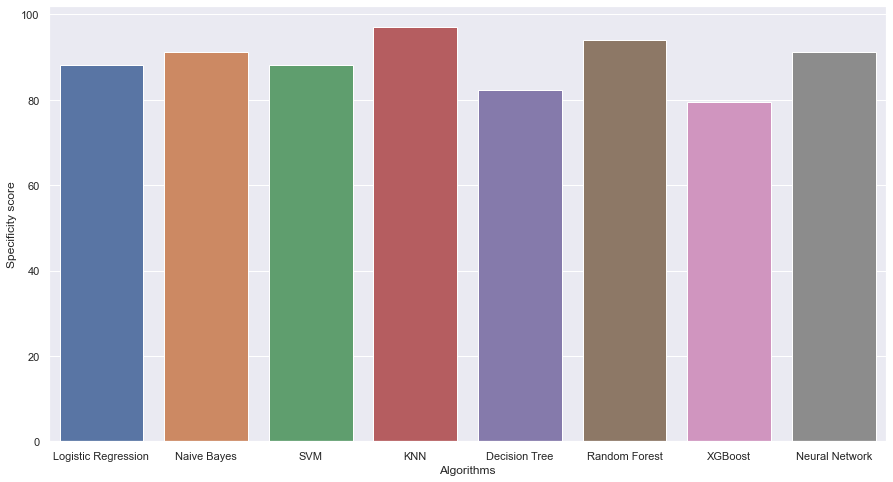

In [ ]:
specificity = [specificity_lr,specificity_nb,specificity_svm,specificity_knn,specificity_dt,specificity_rf,specificity_xgb,specificity_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    
algorithms_1 = ["Logistic Regression","Naive Bayes","SVM","KNN","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The specificity score achieved using "+algorithms[i]+" is: "+str(specificity[i])+" %")

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Specificity score")

sns.barplot(algorithms_1,specificity)

The positive predictive value achieved using Logistic Regression is: 84.61538461538461 %
The positive predictive value achieved using Naive Bayes is: 87.5 %
The positive predictive value achieved using Support Vector Machine is: 83.33333333333334 %
The positive predictive value achieved using K-Nearest Neighbors is: 95.45454545454545 %
The positive predictive value achieved using Decision Tree is: 78.57142857142857 %
The positive predictive value achieved using Random Forest is: 92.0 %
The positive predictive value achieved using XGBoost is: 75.0 %
The positive predictive value achieved using Neural Network is: 88.0 %


<AxesSubplot:xlabel='Algorithms', ylabel='PPV'>

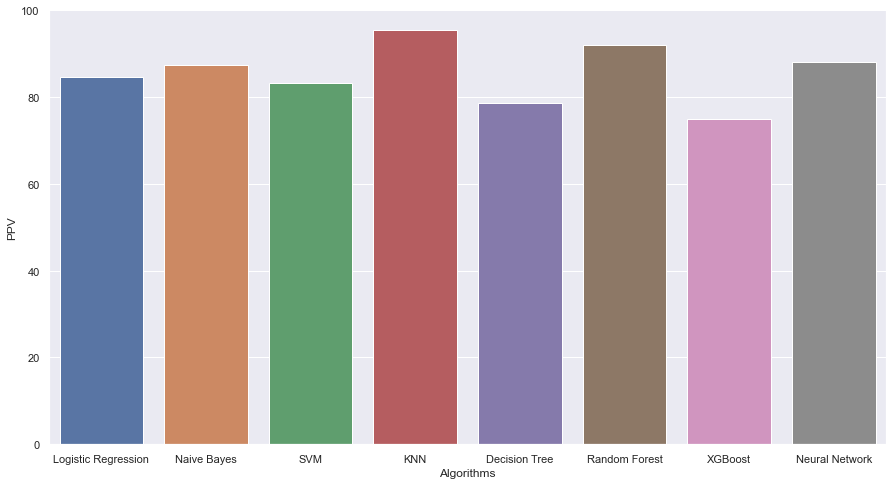

In [ ]:
ppv = [ppv_lr,ppv_nb,ppv_svm,ppv_knn,ppv_dt,ppv_rf,ppv_xgb,ppv_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    
algorithms_1 = ["Logistic Regression","Naive Bayes","SVM","KNN","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The positive predictive value achieved using "+algorithms[i]+" is: "+str(ppv[i])+" %")

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("PPV")

sns.barplot(algorithms_1,ppv)

The negative predictive value achieved using Logistic Regression is: 20.0 %
The negative predictive value achieved using Naive Bayes is: 16.666666666666664 %
The negative predictive value achieved using Support Vector Machine is: 14.285714285714285 %
The negative predictive value achieved using K-Nearest Neighbors is: 16.666666666666664 %
The negative predictive value achieved using Decision Tree is: 20.0 %
The negative predictive value achieved using Random Forest is: 25.0 %
The negative predictive value achieved using XGBoost is: 16.666666666666664 %
The negative predictive value achieved using Neural Network is: 20.0 %


<AxesSubplot:xlabel='Algorithms', ylabel='negative predictive value'>

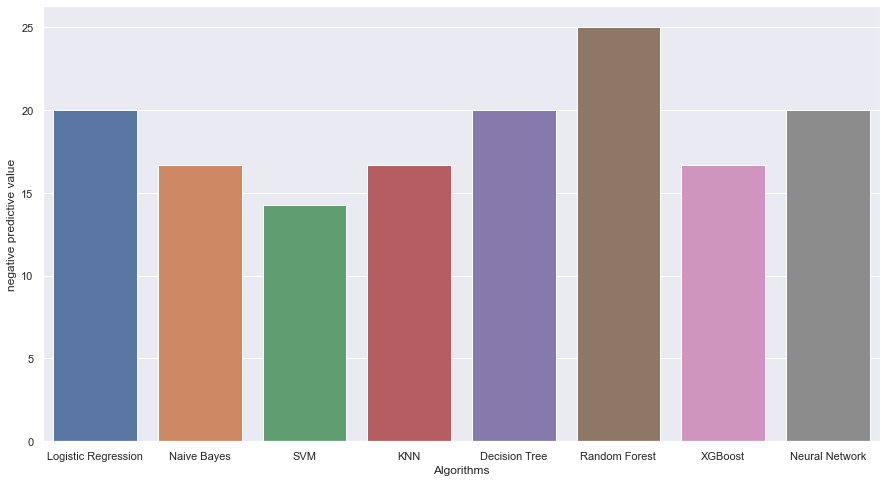

In [ ]:
npv = [npv_lr,npv_nb,npv_svm,npv_knn,npv_dt,npv_rf,npv_xgb,npv_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    
algorithms_1 = ["Logistic Regression","Naive Bayes","SVM","KNN","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The negative predictive value achieved using "+algorithms[i]+" is: "+str(npv[i])+" %")

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("negative predictive value")

sns.barplot(algorithms_1,npv)